# COMP90016 - Assignment 1
Version 1.1 Last edited 11/3/2022.

## Semester 1, 2022


This assignment should be completed by each student individually. Make sure you read this entire document, and ask for help if anything is not clear. Any changes or clarifications to this document will be announced via the LMS.

Please make sure you review the University's rules on academic honesty and plagiarism: https://academichonesty.unimelb.edu.au/

Do not copy any code from other students or from the internet. This is considered plagiarism.

Your completed notebook file containing all your answers will be turned in via LMS. Please also submit an HTML file with the output cleared.

To complete the assignment, finish the tasks in this notebook.

The tasks are a combination of writing your own code, interpreting the results and answering related short-answer questions.

In some cases, we have provided test input and test output that you can use to try out your solutions. These tests are just samples and are **not** exhaustive - they may warn you if you've made a mistake, but they are not guaranteed to. It's up to you to decide whether your code is correct.

**Remember to save your work early and often.**

## Marking

Cells that must be completed to receive marks are clearly labelled. Some cells are code cells, in which you must complete the code to solve a problem. Others are markdown cells, in which you must write your answers to short-answer questions. 

Cells that must be completed to receive marks are labelled like this:

`# -- GRADED CELL (1 mark) - complete this cell --`

Some graded cells are code cells, in which you must complete the code to solve a problem. Other graded cells are markdown cells, in which you must write your answers to short-answer questions. 

You will see the following text in graded code cells:

```
# YOUR CODE HERE
raise NotImplementedError()
```

***You must remove the `raise NotImplementedError()` line from the cell, and replace it with your solution.***

Only add answers to graded cells. If you want to import a library or use a helper function, this must be included in a graded cell.

Only graded cells will be marked.
**Don't make changes outside graded cells, and don't add or remove cells from the notebook**.

>Word limits, where stated, will be strictly enforced. Answers exceeding the limit **will not be marked**.

>Run-time limits will be imposed for each coding question. The run-time of a code cell can be calculated by including `%time` at the top of your cell. Cells exceeding the run-time limit **will not be marked**. The run-time limits only apply to test cases that are included in this document.

No marks are allocated to commenting in your code. We do however, encourage efficient and well commented code.

The total marks for the assignment add up to 100, and it will be worth 10% of your overall subject grade.

Part 1: 35 marks

Part 2: 35 marks

Part 3: 30 marks


## Submitting

Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student ID number below:

In [1]:
NAME = "Ben Field"

ID = "831975"

## Overview

In this assignment, you will answer questions about working with short reads, seqeunce motifs and DNA sequencing technologies.

You will use the `skbio` library in your functions. You may want to refer to sections of the `skbio` documentation for additional help (http://scikit-bio.org/docs/latest). Additional to `skbio` and standard Python 3 functions and methods, you may also use any other library we have used in COMP90016 including `collections`, `numpy`, `pandas`, `math`, `itertools`, `seaborn` and `matplotlib`.

## Part 1: Working with short reads

### Setup

We begin by importing the `skbio` library. The `skbio.io.read` function reads the *FASTQ* file, applying an offset of 33 for the phred scores for quality (quality scores are not used in this assignment). The function returns a generator object which can be used to loop through the file. We will simply convert the readset into a list of skbio.sequence.DNA objects for ease of handling.

The *FASTQ* file you will be using can be downloaded from the LMS. Download the file and place it in the same directory as this notebook. **DO NOT** rename the file. 

In [2]:
# Import the skbio library.
import skbio

In [3]:
# Read in the FASTQ file to produce a generator object named registry.
fname = 'comp90016_assignment_1.fastq'
registry = skbio.io.read(fname, format = 'fastq', phred_offset = 33)

In [4]:
# Append the reads from registry to a list named readset.
readset = []
for r in registry:
    readset.append(r)

### Questions
In the cells below, complete the following tasks:

### Question 1.1

(5 marks)

Write a Python function to compute the percentage of reads that are longer than n bases. Return a floating-point number in the range 0 - 100. Assume n is a positive integer. Assume the input reads are a list of skbio.sequence.DNA or skbio.sequence.Sequence objects. If the input list is empty, return None.

In [5]:
# GRADED CELL 1.1 (5 marks, max 1 min run-time)

def percent_reads_len(reads, n):
    """
    Compute the percentage of reads that are longer than n bases. 
    Assume n is a positive integer.
    Assume the input reads are list of skbio.sequence.DNA or skbio.sequence.Sequence objects.
    Return a floating-point number in the range 0 - 100.
    If the input list is empty, return None.
    """
    valid_reads = 0
    if len(reads) == 0:
        return None
    for read in reads:
        if len(read) > n:
            valid_reads += 1
    return float(valid_reads/len(reads)*100)
    

In [6]:
# Test your function in this cell
# First we will create a list of dummy reads 
# You can learn about the properties of skbio 'DNA' objects here: http://scikit-bio.org/docs/latest/generated/skbio.sequence.DNA.html#skbio.sequence.DNA

demo_reads_a = [skbio.sequence.DNA('ATATA'), skbio.sequence.DNA('GCGCGCGC')]

print(percent_reads_len(demo_reads_a, 5)) # should return 50.0

print(percent_reads_len(readset, 65))

50.0
97.5


In [7]:
# --- AUTOGRADING CELL DO NOT EDIT ----


### Question 1.2

(10 marks)

Suppose quality control metrics indicated that the bases on the 3' end of the reads were of unacceptable base quality. Write a Python function that performs the following tasks and returns the new readset as list of skbio.sequence.DNA objects or skbio.sequence.Sequence objects. Assume trim and min_length are positive integers. Assume the input reads are a list of skbio.sequence.DNA or skbio.sequence.Sequence objects. If the input list is empty, return None.

- Remove any read where trim is greater than or equal to the read length.
- Remove trim bases from the 3' end of each read.
- Remove any read that is less than min_length bases long after trimming.

In [8]:
# GRADED CELL 1.2 (10 marks, max 1 min run-time)

def preprocess_reads(reads, trim, min_length):
    """
    Remove any read where trim is greater than or equal to the read length.
    Remove trim bases from the 3' end of each read.
    Remove any read that is less than min_length bases long after trimming.
    Assume trim and min_length are positive integers.
    Assume the input reads are a list of skbio.sequence.DNA or skbio.sequence.Sequence objects.
    If the input list is empty, return None.
    Return the processed readset as a list of skbio.sequence.DNA or skbio.sequence.Sequence objects.
    """
    
    # YOUR CODE HERE
    new_reads = []
    for read in reads:
        if trim >= len(read):
            continue
        read = read[:-trim]
        if len(read) < min_length:
            continue
        new_reads.append(read)
    return new_reads

In [9]:
# Test your function in this cell

# Create some demo reads of varying lengths
demo_reads_b = [skbio.sequence.DNA('AA'), skbio.sequence.DNA('GAAATCGG'), skbio.sequence.DNA('TTATTT')]

# Test your function
# Should give only one sequence, 'GAAATC' as an skbio.sequence.DNA object, in a list.
print(preprocess_reads(demo_reads_b, 2, 5))
# Or we can print just the sequence of the first (and in this case only) returned seq object.
"First preprocessed read sequence: {seq}".format(seq = preprocess_reads(demo_reads_b, 2, 5)[0])



[DNA
--------------------------
Stats:
    length: 6
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 33.33%
--------------------------
0 GAAATC]


'First preprocessed read sequence: GAAATC'

In [10]:
# Now let's test our function on the full readset. 
# We will use index "[0]" to print only the first read in the list
print(preprocess_reads(readset, 15, 50)[0])

CACCACAGCCCGTTGGCCAACAGGTCAGCAAACTGTTTCAGAATACAGTATGCCAACGCTG


In [11]:
# --- AUTOGRADING CELL DO NOT EDIT ----


### Question 1.3 

(5 marks, max 50 words)

Suppose these reads were to be aligned to a reference genome. Explain why removing very short reads would be useful.



#### -- GRADED CELL (5 marks) - complete this cell -- 
It is difficult to identify the correct position of very short reads. For example, a short read (after accounting for mismatches) would be common in the reference genome and would thus not be informative. It is better to remove these short reads in order to have a more accurate final sequence because it saves time and gives a cleaner data set. 

### Question 1.4

(10 marks)

Write Python code to produce two histograms showing the distribution of read lengths in... 
- the original comp90016_assignment_1_2021.fastq readset.
- the output readset of your preprocess_reads function in part 1.2 using the following parameters: reads = readset, trim = 15 and min_length = 50.

You may show both distributions on the same set of axes, or two completely separate histograms. The plots should be produced inline, in the Jupyter notebook. Choose and appropriate bin-width. Label your axes appropriately (include units). Use labels to make it clear which distribution has been pre-processed.

You may use the readset list of skbio.sequence.DNA objects as input. Your code does not have to include a function.

In [12]:
# Here's some jupyter magic to render plots in the notebook
%matplotlib inline

# You may want to import some additional packages for building and formatting your graphs (non-essential)
# Un-comment as reqired
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn # Makes graphs pretty.
#from collections import Counter

# Here's the data
# Raw reads
readset
# Preprocessed reads
filtered = preprocess_reads(readset, 15, 50)

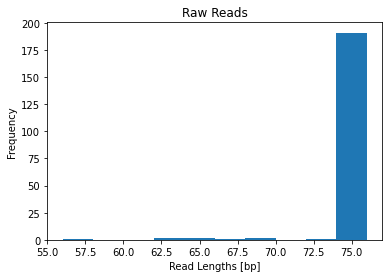

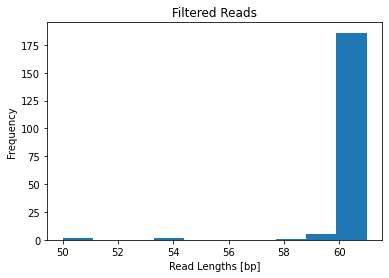

In [13]:
# GRADED CELL 1.4 (10 marks, max 1 min run-time)

# Use this cell to make your histograms.
# YOUR CODE HERE

import matplotlib.pyplot as plt

# get the read lengths
def read_lengths(readset):
    # set up dictionary of read lengths
    
    read_lengths = sorted([len(read) for read in readset])
    return read_lengths

# define the read intervals
# make histogram for Raw reads
raw_reads = read_lengths(readset)
plt.hist(raw_reads)
plt.xlabel("Read Lengths [bp]")
plt.ylabel("Frequency")
plt.title("Raw Reads")
plt.show()

#make histogram for preprocessed reads
preprocessed = read_lengths(filtered)
plt.hist(preprocessed)
plt.xlabel("Read Lengths [bp]")
plt.ylabel("Frequency")
plt.title('Filtered Reads')
plt.show()

### Question 1.5 

(5 marks, max 50 words)

Comment on the effect of the preprocess_reads function on the distribution of read lengths as shown in the histograms from 1.4.



#### -- GRADED CELL (5 marks) - complete this cell -- 

The preprocess_reads function lowers the general distribution by the amount of trim applied to the reads (in this case 15). It also removes any reads that are less than the minimum length after trimming (in this case 50). Thus very short reads after trimming are not shown in the distribution.

## Part 2: Sequence motifs
Sequence motifs are short, recurring patterns in nucleic-acid sequences. Many are involved in important biological functions.

### Setup

In [14]:
# Set up two DNA sequences to test your code on. Do not change these sequences.
linear_seq = skbio.sequence.DNA('TTACAGTGATTATGAAAACTTTGCGGGGCATGGCTACGACTTGTTCAGCCACGTCCGAGGGCAGAAACCTCGAGGGGTTTGTATGTTCAGCTATCTTCTACCCATCCCCGGAGGTTAAGTACGAGGGGAGATGCGGAAGAGGCTCTCGATCATCCCGTGGGACATCAACCTTTCCCTTGATAAAGCACCCCGCTCGGGTA')
circular_seq = skbio.sequence.DNA('TGGCAGAGAGAACGCCTTCTGAATTGTGCTATCCTTCGACCTTATCAAAGCTTGCTACCAATAATTAGGATTATTGCCTTGCGACAGACCTCCTACTCACACTGCCTCACATTGAGCTAGTCAGTGAGCGATTAGCTTGACCCGCTCTCTAGGGTCGCGAGTACGTGAGCTAGGGCTCCGGACTGGGCTATATAGTCGAG')


# Set up a dictionary of sequence motifs. Do not change this dictionary.
motif_dict = {'motif_a': skbio.sequence.DNA('TACAGTG'), 'motif_b': skbio.sequence.DNA('AGCTTGCT'), 'motif_c': skbio.sequence.DNA('ATATATAC'), 'motif_d': skbio.sequence.DNA('CGAGGGG'), 'motif_e': skbio.sequence.DNA('CGAGTG')}

### Questions

### Question 2.1

(10 marks)

Write a Python function to count the number of times sequence motifs are present in a DNA sequence. 

Assume motifs is a dictionary with motif names as strings for keys and skbio.sequence.DNA objects for values. Assume seq is an skbio.sequence.DNA object. 

Return a pandas DataFrame with each motif represented as a row. The first column should contain motif names as strings, the second column should contain integer counts of exact matches. Overlapping motifs should be considered. The column names should be “Motif” and “Counts”. If either seq or motifs are empty, return None.

In [15]:
# GRADED CELL Question 2.1 (10 marks, max 10 min run-time)

import pandas as pd
test_seq = skbio.sequence.DNA('GTTAAAAGGATTCATGAAAGA')
test_motifs = {'motif_a': skbio.sequence.DNA('GTTA'), 'motif_b': skbio.sequence.DNA('AAAA')}

def motif_count(seq, motifs):
    """
    Count the number of times sequence motifs are present in a DNA sequence. 
    Overlapping motifs should be considered
    Assume motifs is a dictionary with motif names as strings for keys and skbio.sequence.DNA objects for values. 
    Assume seq is an skbio.sequence.DNA object. 
    Return a pandas DataFrame with each motif represented as a row. 
    The first column should contain motif names as strings, the second column should contain integer counts of exact matches. 
    The column names should be “Motif” and “Counts”, in that order. 
    If either seq or motifs are empty, return None.
    """
    
   # YOUR CODE HERE
   # count no of sequence occurences
    
    #check if seq or motifs are empty
    if bool(seq) == False or bool(motifs) == False:
        return None
    
    #determine sequence occurrences and record results
    output_dict = {}
    for i in motifs.keys():
        output_dict[i] = seq.count(motifs[i])
        
    #convert results to dataframe  
    df = pd.DataFrame(output_dict.items(), columns=['Motif', 'Counts'])
    return df
        

In [16]:
# ~~ Test your function in this cell ~~
demo_seq = skbio.sequence.DNA('GTTGGATTCATGAAAGA')
demo_motifs = {'motif_a': skbio.sequence.DNA('GTTG'), 'motif_b': skbio.sequence.DNA('AAAA')}

print(motif_count(demo_seq, demo_motifs)) # should output a pandas dataframe with 2 rows and 2 columns. Row 1: motif_a, 1. Row 2: motif_b, 0

print(motif_count(linear_seq, motif_dict))

print(motif_count(test_seq, test_motifs))


     Motif  Counts
0  motif_a       1
1  motif_b       0
     Motif  Counts
0  motif_a       1
1  motif_b       0
2  motif_c       0
3  motif_d       2
4  motif_e       0
     Motif  Counts
0  motif_a       1
1  motif_b       1


In [17]:
# --- AUTOGRADING CELL DO NOT EDIT ----


### Question 2.2

(15 marks)

A colleague is working on sequence motifs in circular DNA molecules. Circular DNA molecules can also be stored in FASTQ files and skbio.sequence.DNA objects but care has to be taken when programming so that the final base is treated as though it is adjacent to the first base. You decide to help your colleague by enhancing your function from 2.1

Write a Python function to count the number of times sequence motifs are present in a circular DNA sequence. 

The function should count the number of exact matches and the number of near misses. A near miss is defined as a sequence that is the same length a sequence motif but has a single base mismatch. Assume motifs is a dictionary with motif names as strings for keys and skbio.sequence.DNA objects for values. Assume seq_circular is an skbio.sequence.DNA object. 

Return a pandas DataFrame with each motif represented as a row. The first column should contain motif names as strings, the second column should contain integer counts of exact matches, the third column should contain integer counts of near misses. The column names should be “Motif”, “Match_counts” and "Near_miss_counts". If either seq_circular or motifs are empty, return None.

In [18]:
## Import additional library
from collections import Counter 

## Helper function
## Use this to identify near miss instances of a reference motif i.e. containing a single base mismatch
def hamming_dist(s1, s2):
    """
    A helper function to calculate the hamming distance between two sequences.
    Assume the input sequences are strings.
    They should be of equal length in order to calculate hamming distance
    """
    assert len(s1) == len(s2)
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

In [19]:
# GRADED CELL Question 2.2 (15 marks, max 1 min run-time)

def motif_count_circular(seq, motifs):
    """
    Count the number of times sequence motifs are present in a circular DNA sequence. 
    Counts the number of exact matches and the number of near misses. 
    A near miss is defined as a sequence that is the same length a sequence motif but has a single base mismatch. 
    Assume motifs is a dictionary with motif names as strings for keys and skbio.sequence.DNA objects for values. 
    Assume seq_circular is an skbio.sequence.DNA object. 
    Return a pandas DataFrame with each motif represented as a row. 
    The first column should contain motif names as strings, the second column should contain integer counts of exact matches, the third column should contain integer counts of near misses.
    The column names should be “Motif”, “Match_counts” and "Near_miss_counts".
    If either seq_circular or motifs are empty, return None.
    """
   
    # YOUR CODE HERE
    # returns None if seq or motifs are empty
    if bool(seq) == False or bool(motifs) == False:
        return None
    
    output = []
    for i in motifs.keys():
        mismatches = 0
        new_list = [i]
        
        
        # circularize sequence
        add_len = len(motifs[i])
        new_seq = str(seq) + str(seq[:len(motifs[i])-1])
        
        # record exact matches
        new_list.append(new_seq.count(str(motifs[i])))
        
        #calculate mismatches
        for x in range(0,len(new_seq)):
            read = new_seq[x:x+add_len] 
            #print("read",read)
            try:
                if hamming_dist(read, str(motifs[i])) == 1:
                    mismatches += 1
            except:
                pass
               
        #add mismatches to output list
        new_list.append(mismatches)
        output.append(new_list)
        
    # convert to pandas dataframe
    df = pd.DataFrame(output, columns=['Motif', 'Match_counts', "Near_miss_counts"])
    return df
        

    
    # for each motif, change the sequence that you're searching in to account for len(motif) -1  appended at the end of the sequence
    


In [20]:
# Test your function in this cell
print(motif_count_circular(demo_seq, demo_motifs)) # should output a pandas dataframe with 2 rows and 3 columns. Row 1: motif_a, 1, 0. Row 2: motif_b, 0, 3

print(motif_count_circular(circular_seq, motif_dict))


     Motif  Match_counts  Near_miss_counts
0  motif_a             1                 0
1  motif_b             0                 3
     Motif  Match_counts  Near_miss_counts
0  motif_a             0                 0
1  motif_b             1                 0
2  motif_c             0                 0
3  motif_d             0                 1
4  motif_e             1                 1


In [21]:
# --- AUTOGRADING CELL DO NOT EDIT ----


### Question 2.3 

(10 marks, max 100 words)

Your colleague plans on running some of their analyses using the Spartan high-performace computing system. They ask your advice on requesting job resources. 
- Describe the potential effect of requesting insufficient memory for a job.
- Describe the potential effect of requesting much more memory than is required for a job.



#### -- GRADED CELL (10 marks) - complete this cell -- 
If insufficient memory is requested, the analysis will not be complete within the allotted time provided to the team. On the Spartan HPC system, if the job is not completed within the allotted time, the system will simply cancel it. As a result, the analysis will have to run all over again and the intitial resources will have been wasted.

If much more memory than required is requested, it might sit in the queue for a long time or you will use more resources than is necessary which could cause problems with your colleauges and administrative staff. 

## Part 3: DNA sequencing technologies

### Setup
Imagine that you are a member of a research team. For each of the following three scenarios, describe which sequencing technology you would recommend and why. Please choose a single technology, rather than a hybrid approach.

### Questions

### Question 3.1 
(5 marks, max 50 words)


A team-member hypothesises that a population of zebrafish with a pigmentation anomaly have a DNA mutation in a specific splice site in a known transcription factor gene. They wish to determine the sequence of DNA in the region of interest. The research group is well funded and based in a major metropolitan area.



#### -- GRADED CELL (5 marks) - complete this cell -- 
Sanger Sequencing would be an appropriate choice as it provides a high level of accuracy but low throughput. So, for a known specific site, it is a good tool as it reduces the chance of errors and the low throughput is not an issue. Given that the team is well funded and based in a metropolitan area, access to sanger sequencing equipment will not be an issue. Amplicon would be the best strategy here as it's best for targeting specific regions. 

### Question 3.2 
(5 marks, max 50 words)


Two different strains of a disease-causing DNA virus have been isolated on a poultry farm. Both strains infect chickens, but one strain appears to cause more severe symptoms. A team-member suggests sequencing the whole genome of both strains and comparing the sequences to identify single-base differences (genetic variants) between the two strains. It is very important that the sequencing is accurate so that the differences are likely to be genuine and not errors.



#### -- GRADED CELL (5 marks) - complete this cell -- 
As accuracy is most important, a short read technology would be best (Illumina or BGI) as these are very high accuracy technologies. Whole Genome Sequencing would be required for both of the strains and then comparison can be made. 

### Question 3.3 
(5 marks, max 50 words)


A remote community has experienced an outbreak of a communicable disease caused by a bacterial pathogen. The disease can be treated, but the treatment options depend on the strain of the bacterium. The only way to distinguish between the different strains is through DNA sequencing. It's important to identify the strain quickly so that the appropriate treatment can be ordered. The community has no existing lab equipment and they require your team to travel to the location to perform the analysis.



#### -- GRADED CELL (5 marks) - complete this cell --
Nanopore is ideal due to speed, accessibility and function. Nanopore allows for rapid sequencing and thus is ideal for the quick identification of the disease. Nanopore sequencers are easily portable and can be used anywhere, so they are the best option for the resource limited community. As Nanopore sequencers are DNA sequencers, they are perfectly capable of identifying the strains. 

### Question 3.4 
(15 marks, max 150 words)


Your research team uses a variety of file formats to store and share sequence data.
Describe the differences between FASTA, FASTQ and GenBank file formats. Describe an example use-case for each of these three file formats that is related to any of the three scenarios above. You don't need to use the same scenario for all three file types.



#### -- GRADED CELL (15 marks) - complete this cell -- 

The FASTA file type is a very simple filetype consisting of a single header and the nucelotide sequence. FASTA files are very easy to work with programatically and can be used for any length of sequence. FASTA file types could be used in the zebrafish scenario as this case would benefit from the data being easily manipulable. Additionally, we are only working with a specifc region of interest, so the lack of in dpeth metadata would not be a serious issue. 


FASTQ file types are what are received from short read sequencers like the Illumina. They consist of a number of short read sequences compiled into readsets. The metadat attached to each read allows for quality control and the removal of low quality reads. FASTQ files would be used in the poultry disease causing DNA scenario as this requiresn short read sequencing. 

GenBank files  can hold a lot of additonal information about a genome. They hold the entire sequence as well as the sequences of all the individual proteins. GenBank files provide large amounts of useful metadata about a genome. This file format would be useful in the case of the disease outbreak in the remote community. The extra information provided in the GenBank files may assist in the rapid identification of cases of the disease. 